# 3

## 3.2

### Importar librerias y leer el dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/LOL.csv")

C:\Users\Gerax\AppData\Local\Temp\ipykernel_24776\3962790380.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Exploracion de datos

In [3]:
# Exploracion de datos
# Para saber las columnas del dataset
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
balanceo = df["blueWins"].value_counts()
print(df["blueWins"].value_counts())

p0 = balanceo[0]/(balanceo[0]+balanceo[1])
p1 = balanceo[1]/(balanceo[0]+balanceo[1])

print("Proporcion de 0s: ", p0)
print("Proporcion de 1s: ", p1)

print("Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede decir que el dataset esta balanceado ")



['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
- - - - - - - BALANCEO - - - - - - -
blueWins
0    4949
1    4930
Name: count, dtype: int64
Proporcion de 0s:  0.5009616357930965
Proporcion de 1s:  0.4990383642069035
Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede decir que el datas

In [4]:
# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# # Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

- - - - - - - TIPOS DE DATOS - - - - - - -
int64      34
float64     6
Name: count, dtype: int64
- - - - - - - VALORES NULLS - - - - - - -
      gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0      False     False            False               False           False   
1      False     False            False               False           False   
2      False     False            False               False           False   
3      False     False            False               False           False   
4      False     False            False               False           False   
...      ...       ...              ...                 ...             ...   
9874   False     False            False               False           False   
9875   False     False            False               False           False   
9876   False     False            False               False           False   
9877   False     False            False               False           F

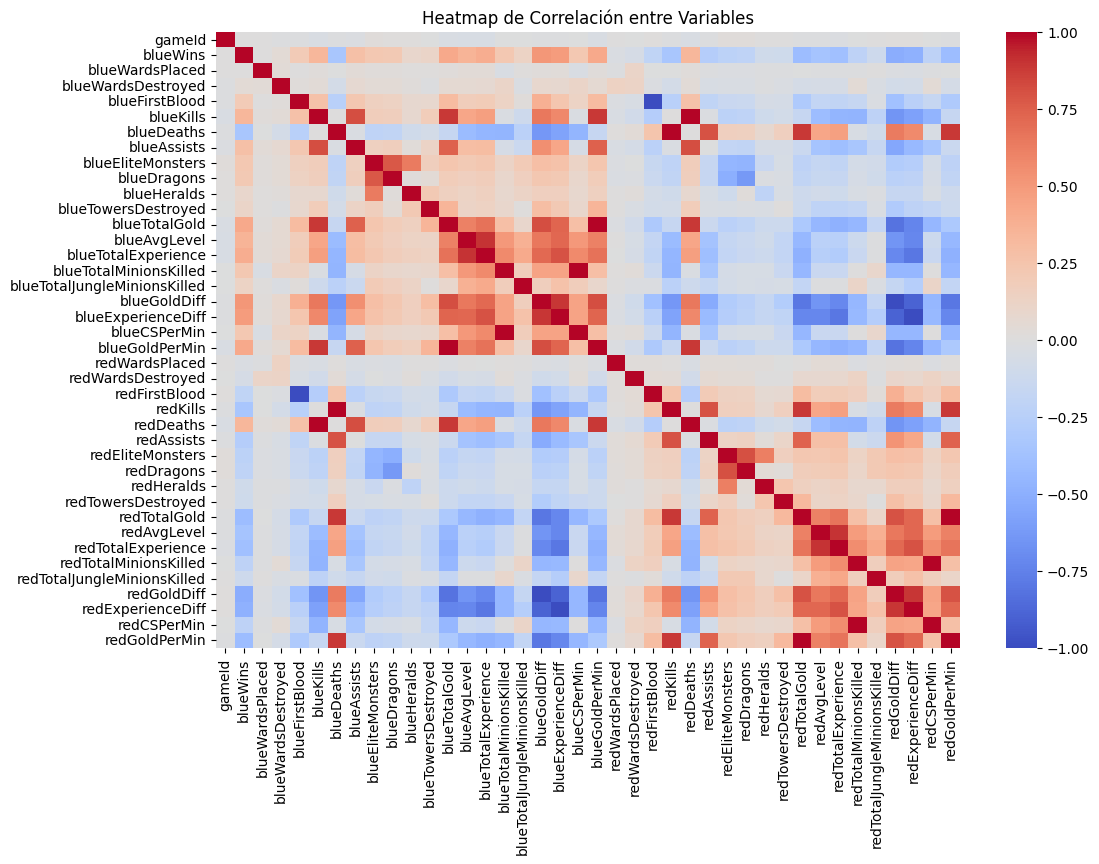

In [4]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Graficar el heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")

plt.title("Heatmap de Correlación entre Variables")
plt.show()

### Modelo (SVM)

# Francis aqui

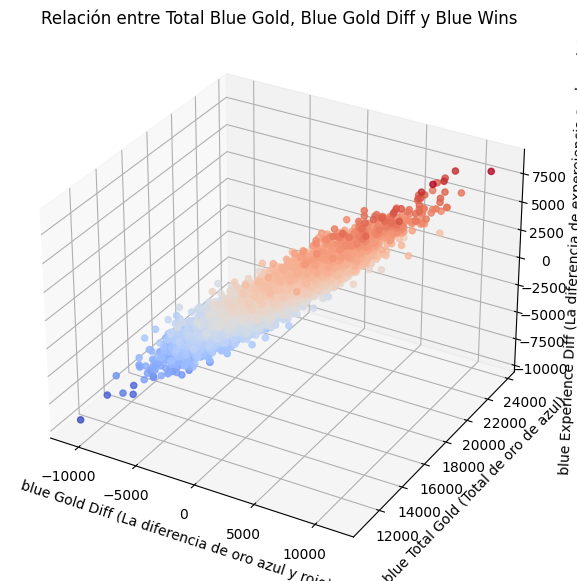

In [5]:
subset = df[["blueGoldDiff", "blueTotalGold", "blueWins", "blueExperienceDiff"]]

x = subset["blueGoldDiff"]
y = subset["blueTotalGold"]
z = subset["blueExperienceDiff"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, cmap="coolwarm", marker='o', alpha=0.8)

ax.set_xlabel("blue Gold Diff (La diferencia de oro azul y rojo)")
ax.set_ylabel("blue Total Gold (Total de oro de azul)")
ax.set_zlabel("blue Experience Diff (La diferencia de expereiencia azul y rojo)")

ax.set_title("Relación entre Total Blue Gold, Blue Gold Diff y Blue Wins")

plt.show()

### Obteniendo variables

In [7]:
train = subset.sample(frac=0.8, random_state=42)
remain = subset.drop(train.index)
test = remain.sample(frac=0.5, random_state=42)
val = remain.drop(test.index)


X_train = train.drop(columns=["blueWins"])
X_val = val.drop(columns=["blueWins"])
X_test = test.drop(columns=["blueWins"])

y_train = train["blueWins"]
y_val = val["blueWins"]
y_test = test["blueWins"]

# Los datos se escalan porque el modelo es sinsible a los datos, es decir, si un numero es muy grande este puede afectar el modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [8]:
class SVM_Custom:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate  # Tasa de aprendizaje
        self.lambda_param = lambda_param  # Parámetro de regularización C que controla el equilibro entre maximizar el margen y reducir la clasificación incorrect
        self.n_iters = n_iters  # Número de iteraciones
        self.w = None  # Pesos del modelo
        self.b = None  # Bias

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Convertir etiquetas a {-1, 1} porque el modelo funciona con estas etiquetas
        processedY = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = processedY[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, processedY[idx]))
                    self.b -= self.lr * processedY[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)


### Encontrar el mejor parametro de regularización

In [9]:
lambda_values = np.logspace(-6, -2, num=10)  
best_lambda = None
best_accuracy = 0

for lambda_val in lambda_values:
    svm = SVM_Custom(learning_rate=0.001, lambda_param=lambda_val, n_iters=1000)
    svm.fit(X_train, y_train)

    y_pred_val = svm.predict(X_val)
    accuracy_val = np.mean(y_pred_val == np.where(y_val <= 0, -1, 1))

    print(f"Valor: {lambda_val:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_lambda = lambda_val

print(f"Mejor Valor encontrado: {best_lambda:.4f}")




Valor: 0.000001 - Precisión en Validación: 0.57
Valor: 0.000003 - Precisión en Validación: 0.57
Valor: 0.000008 - Precisión en Validación: 0.57
Valor: 0.000022 - Precisión en Validación: 0.56
Valor: 0.000060 - Precisión en Validación: 0.54
Valor: 0.000167 - Precisión en Validación: 0.52
Valor: 0.000464 - Precisión en Validación: 0.51
Valor: 0.001292 - Precisión en Validación: 0.51
Valor: 0.003594 - Precisión en Validación: 0.51
Valor: 0.010000 - Precisión en Validación: 0.51
Mejor Valor encontrado: 0.0000


### Entrenando y Haciendo Test

In [18]:
svm = SVM_Custom(learning_rate=0.001, lambda_param=best_lambda, n_iters=1000)
svm.fit(X_train, y_train)

y_pred_test = svm.predict(X_test)

y_pred_test = np.where(y_pred_test == -1, 0, 1)


### Resultados

In [19]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    return TP / (TP + FP) if (TP + FP) > 0 else 0 

def recall(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_pred == 1) & (y_true == 1)) 
    TN = np.sum((y_pred == 0) & (y_true == 0)) 
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1)) 
    return np.array([[TN, FP], [FN, TP]])  


accuracy_test = accuracy(y_test, y_pred_test)
precision_test = precision(y_test, y_pred_test)
recall_test = recall(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)


print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensitivity): {recall_test:.2f}")


Precisión en Test (Accuracy): 0.56
Precisión (Precision): 0.53
Recall (Sensitivity): 1.00


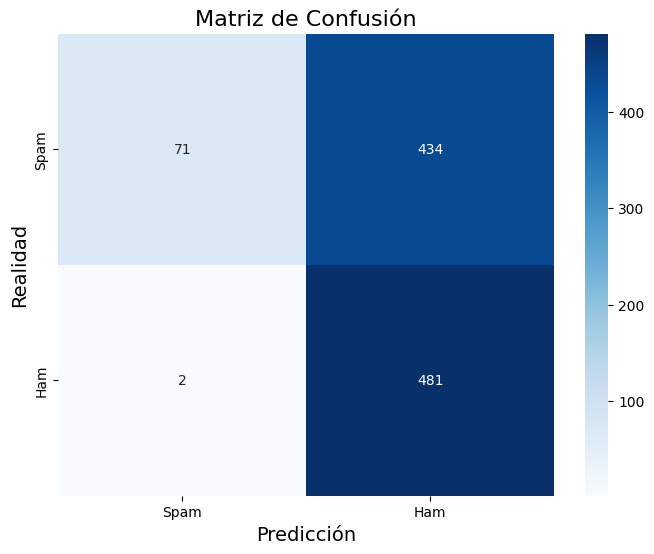

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()

## Con Sklearn

In [13]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

df = pd.read_csv("./data/LOL.csv")


subset = df[["blueGoldDiff", "blueTotalGold", "blueWins", "blueExperienceDiff"]]

X = subset.drop(columns=["blueWins"])
y = subset["blueWins"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (7903, 3), (7903,)
Validation shape: (988, 3), (988,)
Test shape: (988, 3), (988,)


### Encontrar el mejor parametro de regularización

In [14]:
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.48
Valor: 0.000006 - Precisión en Validación: 0.48
Valor: 0.000036 - Precisión en Validación: 0.69
Valor: 0.000215 - Precisión en Validación: 0.72
Valor: 0.001292 - Precisión en Validación: 0.72
Valor: 0.007743 - Precisión en Validación: 0.72
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.72
Valor: 1.668101 - Precisión en Validación: 0.72
Valor: 10.000000 - Precisión en Validación: 0.72
Mejor Valor encontrado: 10.000000


### Resultados

In [15]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
print(cm)



Precisión en Test con C=10.000000: 0.73
Precisión en Test (Accuracy): 0.73
Precisión (Precision): 0.73
Recall (Sensibilidad): 0.71

Matriz de Confusión:
[[375 130]
 [140 343]]


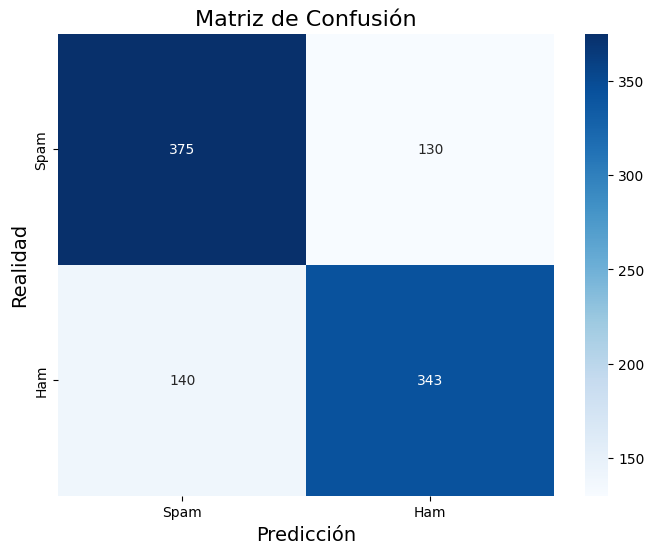

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()


Hay un diferencia bastante grande entre el SVM creado por nosotros y el SVM de la libreria sklearn, por mucho la liberia tiene mejores resultados, con mas sentido y mas consisitentes. La libreria no fallo mucho a comparacion del otro. Ademas, en cuanto a tiempo el modelo que fue mas rapido fue el de la libreria sklearn, itera de mejor forma los datos.